# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Initiate counter for city number below
number = 1

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []

#Loop through each city, extract required items, and print result
print('------------------------------')
print('Start of Records')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')
        

------------------------------
Start of Records
------------------------------
City number 1 of 627 complete. | Added anadyr
Missing data in city number 2 of 627. | Skipping grand river south east
City number 3 of 627 complete. | Added punta arenas
City number 4 of 627 complete. | Added bandiagara
City number 5 of 627 complete. | Added sitio novo do tocantins
City number 6 of 627 complete. | Added greymouth
City number 7 of 627 complete. | Added ushuaia
Missing data in city number 8 of 627. | Skipping menidion
City number 9 of 627 complete. | Added albanel
City number 10 of 627 complete. | Added nikolskoye
City number 11 of 627 complete. | Added tabuk
City number 12 of 627 complete. | Added guerrero negro
City number 13 of 627 complete. | Added chiang mai
City number 14 of 627 complete. | Added la sarre
City number 15 of 627 complete. | Added butaritari
City number 16 of 627 complete. | Added revuca
City number 17 of 627 complete. | Added flinders
City number 18 of 627 complete. | Adde

Missing data in city number 163 of 627. | Skipping gurgan
City number 164 of 627 complete. | Added puerto madryn
Missing data in city number 165 of 627. | Skipping nizhneyansk
City number 166 of 627 complete. | Added otavi
City number 167 of 627 complete. | Added nadym
City number 168 of 627 complete. | Added kapaa
City number 169 of 627 complete. | Added verkhnevilyuysk
City number 170 of 627 complete. | Added rosetta
City number 171 of 627 complete. | Added severo-kurilsk
City number 172 of 627 complete. | Added nanortalik
Missing data in city number 173 of 627. | Skipping chagda
City number 174 of 627 complete. | Added bulgan
City number 175 of 627 complete. | Added new norfolk
City number 176 of 627 complete. | Added quthing
City number 177 of 627 complete. | Added souillac
City number 178 of 627 complete. | Added chuy
City number 179 of 627 complete. | Added san cristobal
City number 180 of 627 complete. | Added marigot
City number 181 of 627 complete. | Added sibolga
City number 

City number 324 of 627 complete. | Added bredasdorp
City number 325 of 627 complete. | Added san quintin
City number 326 of 627 complete. | Added vung tau
City number 327 of 627 complete. | Added ambilobe
City number 328 of 627 complete. | Added srednekolymsk
Missing data in city number 329 of 627. | Skipping karamea
City number 330 of 627 complete. | Added honningsvag
City number 331 of 627 complete. | Added koutsouras
City number 332 of 627 complete. | Added luderitz
City number 333 of 627 complete. | Added darnah
City number 334 of 627 complete. | Added hualmay
City number 335 of 627 complete. | Added leticia
City number 336 of 627 complete. | Added staraya russa
City number 337 of 627 complete. | Added thomasville
City number 338 of 627 complete. | Added wichian buri
City number 339 of 627 complete. | Added yar-sale
City number 340 of 627 complete. | Added umm kaddadah
City number 341 of 627 complete. | Added qaqortoq
City number 342 of 627 complete. | Added ambon
City number 343 o

City number 484 of 627 complete. | Added domoni
City number 485 of 627 complete. | Added pangnirtung
City number 486 of 627 complete. | Added dubna
City number 487 of 627 complete. | Added chenzhou
City number 488 of 627 complete. | Added zhigalovo
City number 489 of 627 complete. | Added port hardy
Missing data in city number 490 of 627. | Skipping tabialan
City number 491 of 627 complete. | Added bukama
City number 492 of 627 complete. | Added lamas
City number 493 of 627 complete. | Added vatava
City number 494 of 627 complete. | Added paamiut
City number 495 of 627 complete. | Added camacha
City number 496 of 627 complete. | Added kaya
City number 497 of 627 complete. | Added brownsville
City number 498 of 627 complete. | Added impfondo
City number 499 of 627 complete. | Added englewood
Missing data in city number 500 of 627. | Skipping velestinon
City number 501 of 627 complete. | Added opuwo
City number 502 of 627 complete. | Added nhulunbuy
Missing data in city number 503 of 627

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.count()

City           576
Latitude       576
Longitude      576
Temperature    576
Humidity       576
Cloudiness     576
Wind Speed     576
dtype: int64

In [5]:
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Anadyr,64.75,177.48,44.26,93,90,15.66
1,Punta Arenas,-53.15,-70.92,23.00,92,20,4.70
2,Bandiagara,14.35,-3.61,92.59,43,91,11.52
3,Sítio Novo do Tocantins,-5.52,-47.46,87.80,45,81,14.99
4,Greymouth,-42.47,171.20,49.17,90,100,9.15


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_max = city_data_df["Humidity"].max()
humidity_max

100

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

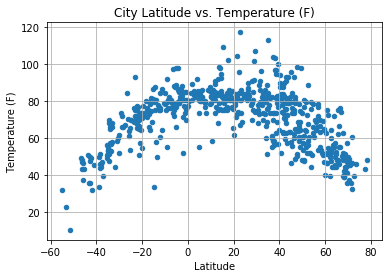

In [10]:
#Plot latitude vs temperature and save as .png

plt.figure()
city_data_df.plot(x="Latitude", y="Temperature", kind = "scatter", marker="o")

plt.title("City Latitude vs. Temperature (F)")
#plt.xlim(-80, 100)
#plt.ylim(0, 140)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.savefig("figures/lat_temp_plot.png")
plt.show()

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

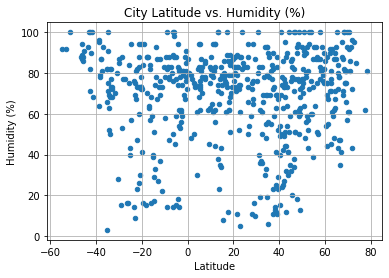

In [11]:
#Plot latitude vs humidity and save as .png

plt.figure()
city_data_df.plot(x="Latitude", y="Humidity", kind = "scatter", marker="o")

plt.title("City Latitude vs. Humidity (%)")
#plt.xlim(-80, 100)
#plt.ylim(-10, 110)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("figures/lat_humid_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

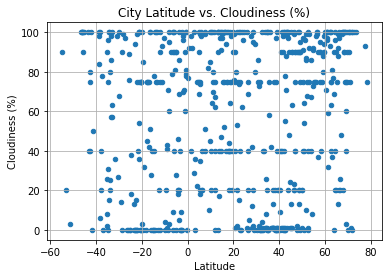

In [12]:
#Plot latitude vs cloudiness and save as .png

plt.figure()
city_data_df.plot(x="Latitude", y="Cloudiness", kind = "scatter", marker="o")

plt.title("City Latitude vs. Cloudiness (%)")
#plt.xlim(-80, 100)
#plt.ylim(-10, 110)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("figures/lat_cloud_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

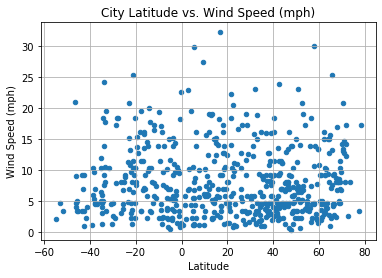

In [13]:
#Plot latitude vs wind speed and save as .png

plt.figure()
city_data_df.plot(x="Latitude", y="Wind Speed", kind = "scatter", marker="o")

plt.title("City Latitude vs. Wind Speed (mph)")
#plt.xlim(-80, 100)
#plt.ylim(-10, 40)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("figures/lat_wind_plot.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = city_data_df.loc[city_data_df["Latitude"] >= 0.0]
#northern_hemi.reset_index(inplace=True)

southern_hemi = city_data_df.loc[city_data_df["Latitude"] < 0.0]
#southern_hemi.reset_index(inplace=True)

In [16]:
northern_hemi.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Anadyr,64.75,177.48,44.26,93,90,15.66
2,Bandiagara,14.35,-3.61,92.59,43,91,11.52
6,Albanel,48.88,-72.45,64.40,68,75,5.82
7,Nikolskoye,59.70,30.79,64.98,82,90,13.42
8,Tabuk,17.42,121.44,76.32,86,100,3.33


In [17]:
southern_hemi.tail()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
564,Neuquén,-38.95,-68.06,33.80,64,100,1.12
565,Tautira,-17.73,-149.15,75.09,88,75,3.36
567,Gizo Government Station,-8.10,156.84,82.02,78,100,9.60
569,Mercedes,-34.65,-59.43,47.48,91,0,4.00
572,Kikwit,-5.04,18.82,97.99,15,0,5.28


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

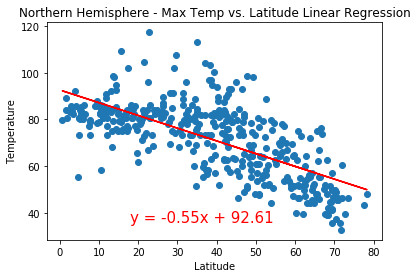

The r-squared is: -0.6850118529878891


In [18]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.savefig("figures/North_Temp_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

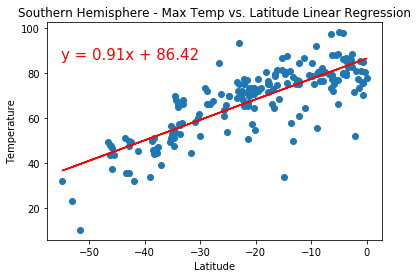

The r-squared is: 0.806040512982494


In [19]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,86),fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.savefig("figures/South_Temp_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

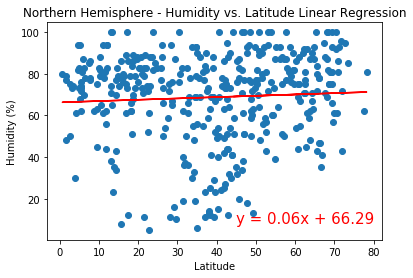

The r-squared is: 0.0576404846709207


In [20]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,8),fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("figures/North_Humid_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

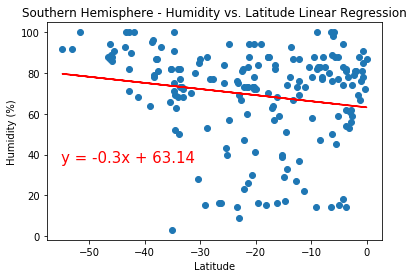

The r-squared is: -0.17598220144104684


In [21]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,36),fontsize=15,color="red")

plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("figures/South_Humid_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

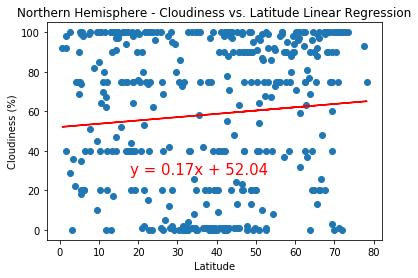

The r-squared is: 0.08724681224399045


In [22]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,28),fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("figures/North_Cloud_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

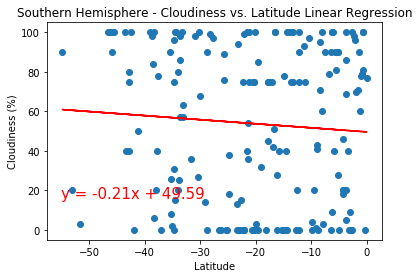

The r-squared is: -0.07278455833352108


In [23]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,16),fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("figures/South_Cloud_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

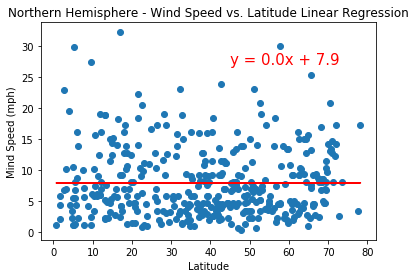

The r-squared is: 0.0009137273105453717


In [24]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,27),fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Mind Speed (mph)')

plt.savefig("figures/North_Wind_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

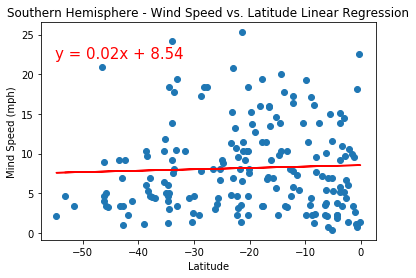

The r-squared is: 0.043180974999153125


In [28]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Mind Speed (mph)')

plt.savefig("figures/South_Wind_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")